In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import cv2
from PIL import Image
import cv2
import pytesseract
from pytesseract import image_to_string
import imutils
import skimage
from matplotlib import cm


In [4]:
import os

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

# Source folder containing the input images
source_folder = r'C:\Users\v23ASayed2\Desktop\IDS\Frontscan'

# Destination folder to save the processed ID numbers
destination_folder = r'C:\Users\v23ASayed2\Desktop\IDS\Cropped_ID_Numbers_Adaptive'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List all files in the source folder
image_files = os.listdir(source_folder)

for filename in image_files:
    # Load the image from the source folder
    image_path = os.path.join(source_folder, filename)
    ID = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(ID, cv2.COLOR_BGR2GRAY)
    ID_resized = cv2.resize(gray, (1000, 630))
    ID_cropped = ID_resized[450:620, 410:960]

    # Apply thresholding to the grayscale image
    _, otsu_thresholded = cv2.threshold(ID_cropped, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    ID_Number = cv2.bitwise_not(otsu_thresholded) #this line is to reverse the colors of the background and the numbers.

    # Save the ID number as an image in the destination folder
    output_path = os.path.join(destination_folder, f'{filename.split(".")[0]}_ID_Number.jpg')
    cv2.imwrite(output_path, ID_Number)

    # Display the thresholded image using Matplotlib (optional)
#     plt.imshow(ID_Number, cmap='gray')
#     plt.show()



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\v23ASayed2\\Desktop\\IDS\\Frontscan'

In [27]:
!pwd

/c/Users/v23ASayed2/Desktop/IDS


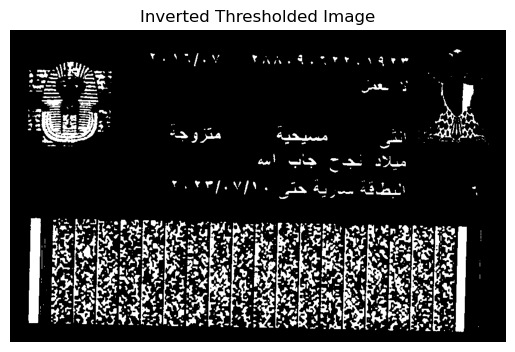

In [6]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Source image path
source_image_path = r'C:\Users\v23ASayed2\Desktop\IDS\back.jpg'  # Replace with your image path

# Load the source image
img = Image.open(source_image_path)

# Convert the image to grayscale
im_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

# Resize the grayscale image
im_gray_resized = cv2.resize(im_gray, (1000, 630))

# Apply thresholding using OpenCV
ret, thresh_img = cv2.threshold(im_gray_resized, 127, 255, cv2.THRESH_BINARY_INV)

# Invert the colors to achieve yellow background and black text


# Display the inverted thresholded image using plt.imshow
plt.imshow(thresh_img, cmap='gray')
plt.title('Inverted Thresholded Image')
plt.axis('off')  # Turn off axes
plt.show()


# Rotating the Back of the ID according to the white pixels


Rotating image 180 degrees.


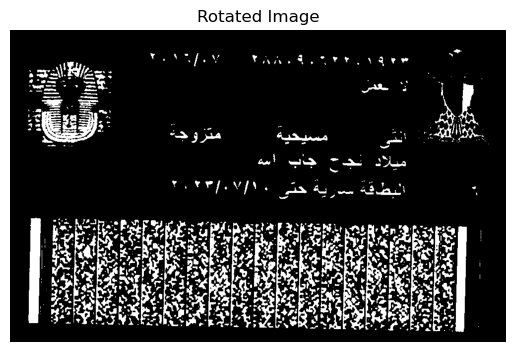

In [14]:
#white pixels in the bottom half are high than the top half
import cv2
import matplotlib.pyplot as plt

# Load the thresholded image
thresholded_image = cv2.imread("threshold_inverted.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate the height of the image
height = thresholded_image.shape[0]

# Split the image into top and bottom halves
top_half = thresholded_image[0:height//2, :]
bottom_half = thresholded_image[height//2:, :]

# Count the white pixels in each half
white_pixels_top = cv2.countNonZero(top_half)
white_pixels_bottom = cv2.countNonZero(bottom_half)

# Compare white pixels and decide whether to rotate
if white_pixels_top > white_pixels_bottom:
    rotated_image = cv2.rotate(thresholded_image, cv2.ROTATE_180)
    print("Rotating image 180 degrees.")
else:
    rotated_image = thresholded_image
    print("Keeping image as it is.")

# Display the rotated image using matplotlib
plt.imshow(rotated_image, cmap='gray')  # Display as grayscale image
plt.title("Rotated Image")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [17]:
pytesseract.pytesseract.tesseract_cmd =r"C:\Users\v23ASayed2\AppData\Local\Programs\Tesseract-OCR\tesseract.exe" #change the value of the exe file path
TESSDATA_PREFIX = r'C:\Users\v23ASayed2\AppData\Local\Programs\Tesseract-OCR' #the path of tesseract-ocr
image_path = r'C:\Users\v23ASayed2\Desktop\IDS\threshold.jpg'
img = cv2.imread(image_path)
IDNumber=image_to_string(img,lang="ara_number",config='--oem 1')

In [18]:
IDNumber = IDNumber.replace(" ", "")
print(IDNumber)

51640



In [40]:
#CER function
from datasets import load_metric
cer_metric = load_metric("cer", revision="master")
def compute_cer(pred_ids, label_ids):
    cer = cer_metric.compute(predictions=pred_ids, references=label_ids)
    return cer

In [81]:
import os
import shutil
import torch
import pandas as pd
from datasets import load_metric
import cv2
import re


# Set the input and output directories
input_dir = r'C:\Users\v23ASayed2\Desktop\IDS\Cropped_ID_Numbers_Adaptive' #Front scanned IDs.
excel_file_path = r'C:\Users\v23ASayed2\Desktop\IDS\national_ids_batch_2.xlsx'  # Table containing ground truth IDs.
mapped_ids_dir = r'C:\Users\v23ASayed2\Desktop\IDS\mapped_ids' #Saving IDs that have mobile number in the table.
problem_dir = r'C:\Users\v23ASayed2\Desktop\IDS\problem' #Save images that doesnt output any numbers from the model.
high_cer_dir = r'C:\Users\v23ASayed2\Desktop\IDS\high_cer'  # saving high CER images.
long_prediction_dir = r'C:\Users\v23ASayed2\Desktop\IDS\long_predictions'  # saving images that outputs more than 14 number from the model.
not_found_file = r'C:\Users\v23ASayed2\Desktop\IDS\not_found_mobiles.txt' #saving mobile numbers that are not found in the table.
output_dir = r'C:\Users\v23ASayed2\Desktop\IDS\outputs' #text files of the extracted IDs
cer_0_dir = r'C:\Users\v23ASayed2\Desktop\IDS\CER_0' #saving images with CER 0 for annotation
cer_7_dir = r'C:\Users\v23ASayed2\Desktop\IDS\cer_7'  # saving images with CER of 7.14%
cer_14_dir = r'C:\Users\v23ASayed2\Desktop\IDS\cer_14' # saving images with CER of 14.29%
# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Initialize variables for total number of errors and total length of national ID number across all text files
total_errors = 0
index = 0 # Number of IDs

# Load the CER metric using the datasets library
# cer_metric = load_metric("cer", revision="master")

# Loop through all images in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Extract the mobile number from the filename
        parts = filename.split('_')
        phone_number_part = parts[-4]
        mobile_number = int(phone_number_part[-10:])  # convert the mobile number to an integer
        
        # Check if the mobile number is in the Excel file
        if mobile_number not in df['msisdn'].values:
            # If mobile number not found, save it to the "not found" file
            with open(not_found_file, 'a') as f:
                f.write(str(mobile_number) + '\n')
            print(f"Added mobile number {mobile_number} to {not_found_file}")  
            continue 

        filtered_df = df.loc[df['msisdn'] == mobile_number, 'id_number']
        if filtered_df.empty:
            print(f"No matching id number found for mobile number {mobile_number} in the Excel file")
            continue

        id_number_str = filtered_df.values[0] #IDs got from the table

        if pd.isna(id_number_str):
            print(f"The id number for mobile number {mobile_number} is NaN in the Excel file")
            continue

        # Convert the ID number to a list of integers
        id_number = int(id_number_str)
        
        # Load the image
        image_path = os.path.join(input_dir, filename)
        img = cv2.imread(image_path)
        
        # Perform inference
        extracted_ids=image_to_string(img,lang="ara_number",config='--oem 1')
        extracted_ids = extracted_ids.replace(" ", "")
        pattern = r'\d+'  # \d matches a digit, + means one or more occurrences of the previous pattern
        matches = re.findall(pattern, extracted_ids)
        print({filename})
        print(extracted_ids)
        
        if matches:
            extracted_ids = max(matches, key=len)
        else:
            problem_path = os.path.join(problem_dir, filename)
            cv2.imwrite(problem_path, img)
            print(f"Saved image {filename} with no output numbers to {problem_dir}")
            continue

        print({filename})
        print(extracted_ids)
        extracted_ids = int(extracted_ids)
        if len(str(extracted_ids)) > 14:
            shutil.copy(image_path, os.path.join(long_prediction_dir, filename))
            print(f"Saved file {filename} with long prediction to {long_prediction_dir}")
        # Calculate the CER between the reference ID number and the extracted IDs
        cer_value = cer_metric.compute(predictions=[extracted_ids], references=[id_number])
        print(f"CER for {filename}: {cer_value:.2%}")
        # If the CER is greater than 14.29%, save the image to the high CER folder
        if cer_value > 0.1429:
            shutil.copy(image_path, os.path.join(high_cer_dir, filename))
            print(f"Saved image {filename} with high CER to {high_cer_dir}")
        # Save the image to its respective CER folder
        elif cer_value == 0:
            shutil.copy(image_path, cer_0_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_0_dir}")
        elif cer_value > 0.070 and cer_value < 0.072:
            shutil.copy(image_path, cer_7_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_7_dir}")
        elif cer_value > 0.13 and cer_value < 0.15 :
            shutil.copy(image_path, cer_14_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_14_dir}")
        # Save the extracted ID to the mapped IDs directory

        total_errors += cer_value
        index += 1
# Calculate the average CER
total_error = total_errors - 12.5
average_cer = total_errors / index
print(f"Average CER: {average_cer:.2%}")

# Print a message indicating the number of files with long predictions that were saved
num_long_predictions = len(os.listdir(long_prediction_dir))
if num_long_predictions > 0:
    print(f"Saved {num_long_predictions} files with long predictions to {long_prediction_dir}")
else:
    print("No files with long predictions were found")

# Print a message indicating the number of files saved to the high CER directory
num_high_cer = len(os.listdir(high_cer_dir))
if num_high_cer > 0:
    print(f"Saved {num_high_cer} images with high CER to {high_cer_dir}")
else:
    print("No images with high CER were found")

# Print a message indicating the number of IDs that were successfully mapped
print(f"Successfully mapped {index} IDs")

{'202211_C_2021011_1004_01028798683_0_ID_Number.jpg'}
28512102102289

{'202211_C_2021011_1004_01028798683_0_ID_Number.jpg'}
28512102102289
CER for 202211_C_2021011_1004_01028798683_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1004_01028798683_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1005_01091137394_0_ID_Number.jpg'}
27408300100776


{'202211_C_2021011_1005_01091137394_0_ID_Number.jpg'}
27408300100776
CER for 202211_C_2021011_1005_01091137394_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1005_01091137394_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1008_01094834679_2_ID_Number.jpg'}
28406092200282

{'202211_C_2021011_1008_01094834679_2_ID_Number.jpg'}
28406092200282
CER for 202211_C_2021011_1008_01094834679_2_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1008_01094834679_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2

{'202211_C_2021011_1085_01015964728_1_ID_Number.jpg'}
305061924001432

{'202211_C_2021011_1085_01015964728_1_ID_Number.jpg'}
305061924001432
Saved file 202211_C_2021011_1085_01015964728_1_ID_Number.jpg with long prediction to C:\Users\v23ASayed2\Desktop\IDS\long_predictions
CER for 202211_C_2021011_1085_01015964728_1_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_1085_01015964728_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_1088_01027537255_0_ID_Number.jpg'}
28559215202826

{'202211_C_2021011_1088_01027537255_0_ID_Number.jpg'}
28559215202826
CER for 202211_C_2021011_1088_01027537255_0_ID_Number.jpg: 64.29%
Saved image 202211_C_2021011_1088_01027537255_0_ID_Number.jpg with high CER to C:\Users\v23ASayed2\Desktop\IDS\high_cer
{'202211_C_2021011_1089_01013462176_1_ID_Number.jpg'}
27109012104719

{'202211_C_2021011_1089_01013462176_1_ID_Number.jpg'}
27109012104719
CER for 202211_C_2021011_1089_01013462176_1_ID_Number.j

CER for 202211_C_2021011_1148_01062793094_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1148_01062793094_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1150_01064319391_0_ID_Number.jpg'}
26202242701356

{'202211_C_2021011_1150_01064319391_0_ID_Number.jpg'}
26202242701356
CER for 202211_C_2021011_1150_01064319391_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1150_01064319391_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1152_01093025482_1_ID_Number.jpg'}
26601121500771

{'202211_C_2021011_1152_01093025482_1_ID_Number.jpg'}
26601121500771
CER for 202211_C_2021011_1152_01093025482_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1152_01093025482_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1157_01015645416_0_ID_Number.jpg'}
28001060104061

{'202211_C_2021011_1157_01015645416_0_ID_Number.jpg'}
28001060104061
CER for 20221

{'202211_C_2021011_1232_01032711847_1_ID_Number.jpg'}
26910011401044

{'202211_C_2021011_1232_01032711847_1_ID_Number.jpg'}
26910011401044
CER for 202211_C_2021011_1232_01032711847_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1232_01032711847_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1233_01099493787_1_ID_Number.jpg'}
28103161400881


{'202211_C_2021011_1233_01099493787_1_ID_Number.jpg'}
28103161400881
CER for 202211_C_2021011_1233_01099493787_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1233_01099493787_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1238_01050914429_0_ID_Number.jpg'}
29005153300039

{'202211_C_2021011_1238_01050914429_0_ID_Number.jpg'}
29005153300039
CER for 202211_C_2021011_1238_01050914429_0_ID_Number.jpg: 85.71%
Saved image 202211_C_2021011_1238_01050914429_0_ID_Number.jpg with high CER to C:\Users\v23ASayed2\Desktop\IDS\high_cer
{'202211_C_20210

{'202211_C_2021011_1296_01017876672_0_ID_Number.jpg'}
28612012702288


{'202211_C_2021011_1296_01017876672_0_ID_Number.jpg'}
28612012702288
CER for 202211_C_2021011_1296_01017876672_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_1296_01017876672_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_1302_01020762836_1_ID_Number.jpg'}
271030501802071

{'202211_C_2021011_1302_01020762836_1_ID_Number.jpg'}
271030501802071
Saved file 202211_C_2021011_1302_01020762836_1_ID_Number.jpg with long prediction to C:\Users\v23ASayed2\Desktop\IDS\long_predictions
CER for 202211_C_2021011_1302_01020762836_1_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_1302_01020762836_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_1305_01063208446_0_ID_Number.jpg'}
27702251601921

{'202211_C_2021011_1305_01063208446_0_ID_Number.jpg'}
27702251601921
CER for 202211_C_2021011_1305_0106

{'202211_C_2021011_1377_01018506349_0_ID_Number.jpg'}
27706181402298

{'202211_C_2021011_1377_01018506349_0_ID_Number.jpg'}
27706181402298
CER for 202211_C_2021011_1377_01018506349_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1377_01018506349_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_137_01016032859_0_ID_Number.jpg'}
28311251402729

{'202211_C_2021011_137_01016032859_0_ID_Number.jpg'}
28311251402729
CER for 202211_C_2021011_137_01016032859_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_137_01016032859_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1380_01098103378_0_ID_Number.jpg'}
28305280300307

{'202211_C_2021011_1380_01098103378_0_ID_Number.jpg'}
28305280300307
CER for 202211_C_2021011_1380_01098103378_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1380_01098103378_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_202101

{'202211_C_2021011_1459_01025460439_0_ID_Number.jpg'}
27007281600334

{'202211_C_2021011_1459_01025460439_0_ID_Number.jpg'}
27007281600334
CER for 202211_C_2021011_1459_01025460439_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1459_01025460439_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1461_01032416950_1_ID_Number.jpg'}
26907232700649

{'202211_C_2021011_1461_01032416950_1_ID_Number.jpg'}
26907232700649
CER for 202211_C_2021011_1461_01032416950_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1461_01032416950_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1462_01098167328_0_ID_Number.jpg'}
27210271500137

{'202211_C_2021011_1462_01098167328_0_ID_Number.jpg'}
27210271500137
CER for 202211_C_2021011_1462_01098167328_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1462_01098167328_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
The id number

{'202211_C_2021011_1554_01099256865_0_ID_Number.jpg'}
66705271500574

{'202211_C_2021011_1554_01099256865_0_ID_Number.jpg'}
66705271500574
CER for 202211_C_2021011_1554_01099256865_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_1554_01099256865_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
The id number for mobile number 1026897516 is NaN in the Excel file
{'202211_C_2021011_1567_01012568324_0_ID_Number.jpg'}
27708172501324

{'202211_C_2021011_1567_01012568324_0_ID_Number.jpg'}
27708172501324
CER for 202211_C_2021011_1567_01012568324_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1567_01012568324_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1568_01067539722_0_ID_Number.jpg'}
29504221400183

{'202211_C_2021011_1568_01067539722_0_ID_Number.jpg'}
29504221400183
CER for 202211_C_2021011_1568_01067539722_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1568_01067539722

{'202211_C_2021011_1650_01050748517_1_ID_Number.jpg'}
28408011504421

{'202211_C_2021011_1650_01050748517_1_ID_Number.jpg'}
28408011504421
CER for 202211_C_2021011_1650_01050748517_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1650_01050748517_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1651_01032038689_0_ID_Number.jpg'}
28509211702848


{'202211_C_2021011_1651_01032038689_0_ID_Number.jpg'}
28509211702848
CER for 202211_C_2021011_1651_01032038689_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1651_01032038689_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1661_01014665095_0_ID_Number.jpg'}
27411301201275

{'202211_C_2021011_1661_01014665095_0_ID_Number.jpg'}
27411301201275
CER for 202211_C_2021011_1661_01014665095_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1661_01014665095_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2

{'202211_C_2021011_1724_01068035461_0_ID_Number.jpg'}
27804171800386

{'202211_C_2021011_1724_01068035461_0_ID_Number.jpg'}
27804171800386
CER for 202211_C_2021011_1724_01068035461_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1724_01068035461_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1727_01021396046_0_ID_Number.jpg'}
27900914120016

{'202211_C_2021011_1727_01021396046_0_ID_Number.jpg'}
27900914120016
CER for 202211_C_2021011_1727_01021396046_0_ID_Number.jpg: 21.43%
Saved image 202211_C_2021011_1727_01021396046_0_ID_Number.jpg with high CER to C:\Users\v23ASayed2\Desktop\IDS\high_cer
{'202211_C_2021011_1733_01032157836_2_ID_Number.jpg'}
28407071502145

{'202211_C_2021011_1733_01032157836_2_ID_Number.jpg'}
28407071502145
CER for 202211_C_2021011_1733_01032157836_2_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1733_01032157836_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_202101

{'202211_C_2021011_1807_01032493816_4_ID_Number.jpg'}
26711222701432

{'202211_C_2021011_1807_01032493816_4_ID_Number.jpg'}
26711222701432
CER for 202211_C_2021011_1807_01032493816_4_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1807_01032493816_4_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1808_01024587356_1_ID_Number.jpg'}
28103261400954

{'202211_C_2021011_1808_01024587356_1_ID_Number.jpg'}
28103261400954
CER for 202211_C_2021011_1808_01024587356_1_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_1808_01024587356_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_1808_01024587356_2_ID_Number.jpg'}
2810326140094

{'202211_C_2021011_1808_01024587356_2_ID_Number.jpg'}
2810326140094
CER for 202211_C_2021011_1808_01024587356_2_ID_Number.jpg: 14.29%
CER of 0.14285714285714285 for image 202211_C_2021011_1808_01024587356_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\

{'202211_C_2021011_1873_01018214193_0_ID_Number.jpg'}
27808171601074

{'202211_C_2021011_1873_01018214193_0_ID_Number.jpg'}
27808171601074
CER for 202211_C_2021011_1873_01018214193_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_1873_01018214193_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_1873_01018214193_2_ID_Number.jpg'}
27808171601974

{'202211_C_2021011_1873_01018214193_2_ID_Number.jpg'}
27808171601974
CER for 202211_C_2021011_1873_01018214193_2_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1873_01018214193_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_187_01025981907_0_ID_Number.jpg'}
29612041701051


{'202211_C_2021011_187_01025981907_0_ID_Number.jpg'}
29612041701051
CER for 202211_C_2021011_187_01025981907_0_ID_Number.jpg: 57.14%
Saved image 202211_C_2021011_187_01025981907_0_ID_Number.jpg with high CER to C:\Users\v23ASayed2\Desktop\IDS\high_cer
{'20

{'202211_C_2021011_1964_01013707483_1_ID_Number.jpg'}
27912140101649

{'202211_C_2021011_1964_01013707483_1_ID_Number.jpg'}
27912140101649
CER for 202211_C_2021011_1964_01013707483_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1964_01013707483_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1965_01016810696_0_ID_Number.jpg'}
29607061202626

{'202211_C_2021011_1965_01016810696_0_ID_Number.jpg'}
29607061202626
CER for 202211_C_2021011_1965_01016810696_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1965_01016810696_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_1974_01021760102_0_ID_Number.jpg'}
28106252501051

{'202211_C_2021011_1974_01021760102_0_ID_Number.jpg'}
28106252501051
CER for 202211_C_2021011_1974_01021760102_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_1974_01021760102_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_20

{'202211_C_2021011_2152_01091141578_1_ID_Number.jpg'}
27011050105052

{'202211_C_2021011_2152_01091141578_1_ID_Number.jpg'}
27011050105052
CER for 202211_C_2021011_2152_01091141578_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2152_01091141578_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2175_01061834638_0_ID_Number.jpg'}
30602040200864

{'202211_C_2021011_2175_01061834638_0_ID_Number.jpg'}
30602040200864
CER for 202211_C_2021011_2175_01061834638_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2175_01061834638_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2179_01027842174_1_ID_Number.jpg'}
27507101500771

{'202211_C_2021011_2179_01027842174_1_ID_Number.jpg'}
27507101500771
CER for 202211_C_2021011_2179_01027842174_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2179_01027842174_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_20

{'202211_C_2021011_2317_01025048299_1_ID_Number.jpg'}
26209160400255

{'202211_C_2021011_2317_01025048299_1_ID_Number.jpg'}
26209160400255
CER for 202211_C_2021011_2317_01025048299_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2317_01025048299_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2318_01095269161_0_ID_Number.jpg'}
27508101301295

{'202211_C_2021011_2318_01095269161_0_ID_Number.jpg'}
27508101301295
CER for 202211_C_2021011_2318_01095269161_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2318_01095269161_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2322_01062379608_0_ID_Number.jpg'}
0506231500884

{'202211_C_2021011_2322_01062379608_0_ID_Number.jpg'}
0506231500884
CER for 202211_C_2021011_2322_01062379608_0_ID_Number.jpg: 21.43%
Saved image 202211_C_2021011_2322_01062379608_0_ID_Number.jpg with high CER to C:\Users\v23ASayed2\Desktop\IDS\high_cer
{'202211_C_2021011_

{'202211_C_2021011_24_01098417832_1_ID_Number.jpg'}
28003171500642

{'202211_C_2021011_24_01098417832_1_ID_Number.jpg'}
28003171500642
CER for 202211_C_2021011_24_01098417832_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_24_01098417832_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2500_01014950226_0_ID_Number.jpg'}
28608011900414

{'202211_C_2021011_2500_01014950226_0_ID_Number.jpg'}
28608011900414
CER for 202211_C_2021011_2500_01014950226_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2500_01014950226_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2503_01028969354_2_ID_Number.jpg'}
28404081302502

{'202211_C_2021011_2503_01028969354_2_ID_Number.jpg'}
28404081302502
CER for 202211_C_2021011_2503_01028969354_2_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_2503_01028969354_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202

{'202211_C_2021011_2568_01064890539_0_ID_Number.jpg'}
27312181301051

{'202211_C_2021011_2568_01064890539_0_ID_Number.jpg'}
27312181301051
CER for 202211_C_2021011_2568_01064890539_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2568_01064890539_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2579_01092276320_0_ID_Number.jpg'}
27610071600252

{'202211_C_2021011_2579_01092276320_0_ID_Number.jpg'}
27610071600252
CER for 202211_C_2021011_2579_01092276320_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_2579_01092276320_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_257_01064619302_2_ID_Number.jpg'}
29912192102510

{'202211_C_2021011_257_01064619302_2_ID_Number.jpg'}
29912192102510
CER for 202211_C_2021011_257_01064619302_2_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_257_01064619302_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Des

{'202211_C_2021011_265_01067196432_1_ID_Number.jpg'}
28504041701327

{'202211_C_2021011_265_01067196432_1_ID_Number.jpg'}
28504041701327
CER for 202211_C_2021011_265_01067196432_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_265_01067196432_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2660_01069021208_2_ID_Number.jpg'}
26610100300118

{'202211_C_2021011_2660_01069021208_2_ID_Number.jpg'}
26610100300118
CER for 202211_C_2021011_2660_01069021208_2_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2660_01069021208_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2664_01033016872_0_ID_Number.jpg'}
25912051202451

{'202211_C_2021011_2664_01033016872_0_ID_Number.jpg'}
25912051202451
CER for 202211_C_2021011_2664_01033016872_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2664_01033016872_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_202101

{'202211_C_2021011_2743_01013845379_0_ID_Number.jpg'}
27902120105952

{'202211_C_2021011_2743_01013845379_0_ID_Number.jpg'}
27902120105952
CER for 202211_C_2021011_2743_01013845379_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2743_01013845379_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2744_01017196433_0_ID_Number.jpg'}
279010113241851

{'202211_C_2021011_2744_01017196433_0_ID_Number.jpg'}
279010113241851
Saved file 202211_C_2021011_2744_01017196433_0_ID_Number.jpg with long prediction to C:\Users\v23ASayed2\Desktop\IDS\long_predictions
CER for 202211_C_2021011_2744_01017196433_0_ID_Number.jpg: 14.29%
CER of 0.14285714285714285 for image 202211_C_2021011_2744_01017196433_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_14
{'202211_C_2021011_2745_01028590231_0_ID_Number.jpg'}
2780621160124

{'202211_C_2021011_2745_01028590231_0_ID_Number.jpg'}
2780621160124
CER for 202211_C_2021011_2745_01028590231_0_ID_Numb

{'202211_C_2021011_2805_01032416941_0_ID_Number.jpg'}
26112250105051

{'202211_C_2021011_2805_01032416941_0_ID_Number.jpg'}
26112250105051
CER for 202211_C_2021011_2805_01032416941_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_2805_01032416941_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_280_01099792683_0_ID_Number.jpg'}
28001122400231

{'202211_C_2021011_280_01099792683_0_ID_Number.jpg'}
28001122400231
CER for 202211_C_2021011_280_01099792683_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_280_01099792683_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2811_01091140895_1_ID_Number.jpg'}
27011050105052

{'202211_C_2021011_2811_01091140895_1_ID_Number.jpg'}
27011050105052
CER for 202211_C_2021011_2811_01091140895_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2811_01091140895_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{

{'202211_C_2021011_2892_01026428132_0_ID_Number.jpg'}
27010132600179

{'202211_C_2021011_2892_01026428132_0_ID_Number.jpg'}
27010132600179
CER for 202211_C_2021011_2892_01026428132_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2892_01026428132_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2897_01027628134_0_ID_Number.jpg'}
28107071500114

{'202211_C_2021011_2897_01027628134_0_ID_Number.jpg'}
28107071500114
CER for 202211_C_2021011_2897_01027628134_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2897_01027628134_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2899_01068137598_0_ID_Number.jpg'}
28110011305682

{'202211_C_2021011_2899_01068137598_0_ID_Number.jpg'}
28110011305682
CER for 202211_C_2021011_2899_01068137598_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2899_01068137598_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_20

{'202211_C_2021011_2976_01025072583_1_ID_Number.jpg'}
27110221300592

{'202211_C_2021011_2976_01025072583_1_ID_Number.jpg'}
27110221300592
CER for 202211_C_2021011_2976_01025072583_1_ID_Number.jpg: 14.29%
CER of 0.14285714285714285 for image 202211_C_2021011_2976_01025072583_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_14
{'202211_C_2021011_2984_01018496993_0_ID_Number.jpg'}
27008131401534

{'202211_C_2021011_2984_01018496993_0_ID_Number.jpg'}
27008131401534
CER for 202211_C_2021011_2984_01018496993_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2984_01018496993_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_2986_01095438991_1_ID_Number.jpg'}
27712181401356

{'202211_C_2021011_2986_01095438991_1_ID_Number.jpg'}
27712181401356
CER for 202211_C_2021011_2986_01095438991_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_2986_01095438991_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\C

{'202211_C_2021011_3042_01015956741_3_ID_Number.jpg'}
905292400998

{'202211_C_2021011_3042_01015956741_3_ID_Number.jpg'}
905292400998
CER for 202211_C_2021011_3042_01015956741_3_ID_Number.jpg: 14.29%
CER of 0.14285714285714285 for image 202211_C_2021011_3042_01015956741_3_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_14
{'202211_C_2021011_3044_01094349505_0_ID_Number.jpg'}
28203211401871

{'202211_C_2021011_3044_01094349505_0_ID_Number.jpg'}
28203211401871
CER for 202211_C_2021011_3044_01094349505_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3044_01094349505_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3045_01091705931_0_ID_Number.jpg'}
27902142200142

{'202211_C_2021011_3045_01091705931_0_ID_Number.jpg'}
27902142200142
CER for 202211_C_2021011_3045_01091705931_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3045_01091705931_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0

{'202211_C_2021011_3097_01015618926_1_ID_Number.jpg'}

Saved image 202211_C_2021011_3097_01015618926_1_ID_Number.jpg with no output numbers to C:\Users\v23ASayed2\Desktop\IDS\problem
{'202211_C_2021011_3101_01002459236_0_ID_Number.jpg'}
7210181700556

{'202211_C_2021011_3101_01002459236_0_ID_Number.jpg'}
7210181700556
CER for 202211_C_2021011_3101_01002459236_0_ID_Number.jpg: 14.29%
CER of 0.14285714285714285 for image 202211_C_2021011_3101_01002459236_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_14
{'202211_C_2021011_3102_01016943306_0_ID_Number.jpg'}
26911062100134

{'202211_C_2021011_3102_01016943306_0_ID_Number.jpg'}
26911062100134
CER for 202211_C_2021011_3102_01016943306_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3102_01016943306_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3105_01095215205_0_ID_Number.jpg'}
27504191301595

{'202211_C_2021011_3105_01095215205_0_ID_Number.jpg'}
27504191301595
CER 

{'202211_C_2021011_316_01090218396_0_ID_Number.jpg'}
27408101401554

{'202211_C_2021011_316_01090218396_0_ID_Number.jpg'}
27408101401554
CER for 202211_C_2021011_316_01090218396_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_316_01090218396_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3170_01021703759_1_ID_Number.jpg'}
26712071800777


{'202211_C_2021011_3170_01021703759_1_ID_Number.jpg'}
26712071800777
CER for 202211_C_2021011_3170_01021703759_1_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_3170_01021703759_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_3174_01092011057_1_ID_Number.jpg'}
27107061300571

{'202211_C_2021011_3174_01092011057_1_ID_Number.jpg'}
27107061300571
CER for 202211_C_2021011_3174_01092011057_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3174_01092011057_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0


{'202211_C_2021011_3234_01020497995_0_ID_Number.jpg'}
28403178800461

{'202211_C_2021011_3234_01020497995_0_ID_Number.jpg'}
28403178800461
CER for 202211_C_2021011_3234_01020497995_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3234_01020497995_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3236_01093078612_0_ID_Number.jpg'}
26809062600159

{'202211_C_2021011_3236_01093078612_0_ID_Number.jpg'}
26809062600159
CER for 202211_C_2021011_3236_01093078612_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_3236_01093078612_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_3241_01063176856_0_ID_Number.jpg'}
28108212600807

{'202211_C_2021011_3241_01063176856_0_ID_Number.jpg'}
28108212600807
CER for 202211_C_2021011_3241_01063176856_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3241_01063176856_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER

{'202211_C_2021011_3300_01025623658_0_ID_Number.jpg'}
30610082700401

{'202211_C_2021011_3300_01025623658_0_ID_Number.jpg'}
30610082700401
CER for 202211_C_2021011_3300_01025623658_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3300_01025623658_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3310_01014297387_1_ID_Number.jpg'}
27803270102082

{'202211_C_2021011_3310_01014297387_1_ID_Number.jpg'}
27803270102082
CER for 202211_C_2021011_3310_01014297387_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3310_01014297387_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3313_01032649246_0_ID_Number.jpg'}
2870606150115

{'202211_C_2021011_3313_01032649246_0_ID_Number.jpg'}
2870606150115
CER for 202211_C_2021011_3313_01032649246_0_ID_Number.jpg: 64.29%
Saved image 202211_C_2021011_3313_01032649246_0_ID_Number.jpg with high CER to C:\Users\v23ASayed2\Desktop\IDS\high_cer
{'202211_C_2021011_

{'202211_C_2021011_3376_01032051726_0_ID_Number.jpg'}
28002171801573

{'202211_C_2021011_3376_01032051726_0_ID_Number.jpg'}
28002171801573
CER for 202211_C_2021011_3376_01032051726_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3376_01032051726_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3376_01032051726_3_ID_Number.jpg'}
28002171801573

{'202211_C_2021011_3376_01032051726_3_ID_Number.jpg'}
28002171801573
CER for 202211_C_2021011_3376_01032051726_3_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3376_01032051726_3_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3377_01092139487_0_ID_Number.jpg'}
25412051501978

{'202211_C_2021011_3377_01092139487_0_ID_Number.jpg'}
25412051501978
CER for 202211_C_2021011_3377_01092139487_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3377_01092139487_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_20

{'202211_C_2021011_3432_01032106926_0_ID_Number.jpg'}
27406200101985

{'202211_C_2021011_3432_01032106926_0_ID_Number.jpg'}
27406200101985
CER for 202211_C_2021011_3432_01032106926_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3432_01032106926_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3433_01012803986_0_ID_Number.jpg'}
26607232403519

{'202211_C_2021011_3433_01012803986_0_ID_Number.jpg'}
26607232403519
CER for 202211_C_2021011_3433_01012803986_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3433_01012803986_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
The id number for mobile number 1012839207 is NaN in the Excel file
{'202211_C_2021011_3446_01016504515_0_ID_Number.jpg'}
27710121601582

{'202211_C_2021011_3446_01016504515_0_ID_Number.jpg'}
27710121601582
CER for 202211_C_2021011_3446_01016504515_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3446_01016504515_0_ID_Number.jpg

{'202211_C_2021011_3515_01064374900_0_ID_Number.jpg'}
28301201603016

444555448

{'202211_C_2021011_3515_01064374900_0_ID_Number.jpg'}
28301201603016
CER for 202211_C_2021011_3515_01064374900_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_3515_01064374900_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_3518_01092046521_0_ID_Number.jpg'}
28101051501698

{'202211_C_2021011_3518_01092046521_0_ID_Number.jpg'}
28101051501698
CER for 202211_C_2021011_3518_01092046521_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3518_01092046521_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3522_01069463510_0_ID_Number.jpg'}
27601232501206

{'202211_C_2021011_3522_01069463510_0_ID_Number.jpg'}
27601232501206
CER for 202211_C_2021011_3522_01069463510_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3522_01069463510_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desk

{'202211_C_2021011_3595_01021645363_0_ID_Number.jpg'}
27801060104475

{'202211_C_2021011_3595_01021645363_0_ID_Number.jpg'}
27801060104475
CER for 202211_C_2021011_3595_01021645363_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_3595_01021645363_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_3595_01021645363_2_ID_Number.jpg'}
27801090104475

{'202211_C_2021011_3595_01021645363_2_ID_Number.jpg'}
27801090104475
CER for 202211_C_2021011_3595_01021645363_2_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3595_01021645363_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_35_01032071931_0_ID_Number.jpg'}
27609150101154

{'202211_C_2021011_35_01032071931_0_ID_Number.jpg'}
27609150101154
CER for 202211_C_2021011_35_01032071931_0_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_35_01032071931_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202

{'202211_C_2021011_3670_01063926140_2_ID_Number.jpg'}
28006302400575

{'202211_C_2021011_3670_01063926140_2_ID_Number.jpg'}
28006302400575
CER for 202211_C_2021011_3670_01063926140_2_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3670_01063926140_2_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER_0
{'202211_C_2021011_3672_01097830253_0_ID_Number.jpg'}
27104182701075

{'202211_C_2021011_3672_01097830253_0_ID_Number.jpg'}
27104182701075
CER for 202211_C_2021011_3672_01097830253_0_ID_Number.jpg: 7.14%
CER of 0.07142857142857142 for image 202211_C_2021011_3672_01097830253_0_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\cer_7
{'202211_C_2021011_3674_01090287015_1_ID_Number.jpg'}
27708072400318

{'202211_C_2021011_3674_01090287015_1_ID_Number.jpg'}
27708072400318
CER for 202211_C_2021011_3674_01090287015_1_ID_Number.jpg: 0.00%
CER of 0.0 for image 202211_C_2021011_3674_01090287015_1_ID_Number.jpg. Image saved to C:\Users\v23ASayed2\Desktop\IDS\CER

# Detecting The orientation of the back of the ID